<a href="https://colab.research.google.com/github/vitorbeltrao/CO2Emissions/blob/main/An%C3%A1lise_emissao_CO2_planeta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos dados de emissão de CO2 no planeta

Cerca de 86% das emissões de dióxido de carbono do mundo vêm da queima de combustíveis fósseis para a produção de energia e materiais.

As primeiras eras da industrialização foram dominadas pela queima de carvão vegetal. Só no final do século 19 começam a aumentar as emissões por petróleo e gás natural. E, no final do século 20, as emissões pela produção de cimento e pela chama — um dispositivo de combustão de gases inflamáveis usado na indústria, se tornam mais significativas.

**Cerca de 52,74% da emissão de CO2 em todo o mundo ocorreu a partir de 1990, ou seja, mais da metade das emissões ocorreram nos últimos 30 anos.**

<p align=center>
<img src="https://image.freepik.com/free-photo/janschwalde-power-plant-germany_181624-50198.jpg" width="50%"></p>

A alta concentração de dióxido de carbono leva à poluição do ar, formação de chuva ácida e desequilíbrio do efeito estufa (com consequente elevação da temperatura da Terra), que traz consigo o derretimento de calotas de gelo e a elevação dos níveis oceânicos, resultando em uma grande degradação ambiental de ecossistemas e paisagens. 

**Por esse motivo, é que uma empresa ambiental nos procurou para realizar um estudo baseado em dados.**

***
**Vamos as perguntas solicitadas pela empresa:**

1. Quais são os países com maiores emissões per capita no ano mais recente;
2. Dentre os países listados na pergunta (1), queremos os vinte países que possuem as maiores populações, junto ao seu respectivo PIB;
3. Para os países listados na pergunta (2), queremos saber as mudanças ao longo do tempo em um intervalo de vinte anos;
4. Além de analisar as maiores emissões per capita dos vinte países com as maiores populações, queremos saber as emissões anuais destes países no ano mais recente. 

**Resumindo: precisamos basicamente, selecionar os países com as maiores emissões per capita no último ano, desses países, selecionaremos os vinte que possuem as maiores populações, junto ao respectivo PIB (também baseado pelo último ano).**

**Queremos analisar as mudanças das emissões per capita dos últimos vinte anos (dos países selecionados acima), além das emissões anuais dos mesmos, mas essa, apenas no último ano.**

## 1. Coleta dos dados

Os dados foram coletados do [ourworldindata](https://ourworldindata.org/) e do [worldbank](https://data.worldbank.org/). Essas são fontes de dados confiáveis e utilizadas por diversas pessoas e empresas. As fontes são extremamente importantes para que se obtenha um trabalho legítimo.

In [ ]:
# Importar os pacotes necessários.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

# Código que transforma o csv em um dataframe pandas
df1 = pd.read_csv("https://raw.githubusercontent.com/vitorbeltrao/Datasets/main/co-emissions-per-capita.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/vitorbeltrao/Datasets/main/annual-co2-emissions-per-country.csv")
df3 = pd.read_excel("https://github.com/vitorbeltrao/Datasets/blob/main/API_SP.POP.TOTL_DS2_en_excel_v2_3158861.xls?raw=true")
df4 = pd.read_excel("https://github.com/vitorbeltrao/Datasets/blob/main/API_NY.GDP.MKTP.CD_DS2_en_excel_v2_3158925.xls?raw=true")

## 2. Análise Exploratória

Vamos utilizar as perguntas oriundas do negócio para fazer essa análise e consequentemente respondê-las. Dessa forma geramos valor, melhoramos a tomada de decisão por parte da companhia e possivelmente ajudaremos a incrementar os lucros.


### 2.1. Preparação do conjunto de dados

Nesta primeira etapa da análise exploratória, vamos analisar nossos conjuntos de dados de maneira visual e prepará-los para respondermos as perguntas necessárias ao negócio.

Como essa é uma etapa onde praticamente iremos fazer a união das quatro tabelas coletadas, não vou mostrar aqui nesse artigo. Caso você queira ver como foi feita essa união, acesse esse notebook pelo meu [github](https://github.com/vitorbeltrao/VB_data_science).

* Verificar as primeiras entradas dos conjuntos de dados de emissão de CO2

In [ ]:
# Verificar as 5 primeiras linhas do conjunto de dados
df1.head()

,Entity,Code,Year,Annual CO2 emissions (per capita)
0,Afghanistan,AFG,1949,0.0019
1,Afghanistan,AFG,1950,0.0109
2,Afghanistan,AFG,1951,0.0117
3,Afghanistan,AFG,1952,0.0115
4,Afghanistan,AFG,1953,0.0132


In [ ]:
# Verificar as 5 primeiras linhas do conjunto de dados
df2.head()

,Entity,Code,Year,Annual CO2 emissions
0,Afghanistan,AFG,1949,14656
1,Afghanistan,AFG,1950,84272
2,Afghanistan,AFG,1951,91600
3,Afghanistan,AFG,1952,91600
4,Afghanistan,AFG,1953,106256


Note que a estrutura dos dois conjuntos de dados é bastante parecida, seria interessante unir os dois dataframes e trabalharmos apenas com um deles para otimizarmos tempo.

* Verificar o tamanho, tipo e valores nulos dos dados dos conjuntos de dados de emissão de CO2

In [ ]:
# Verificar o tamanho, tipo e valores nulos dos dados
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23307 entries, 0 to 23306
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Entity                             23307 non-null  object 
 1   Code                               21000 non-null  object 
 2   Year                               23307 non-null  int64  
 3   Annual CO2 emissions (per capita)  23307 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 728.5+ KB


In [ ]:
# Verificar o tamanho, tipo e valores nulos dos dados
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23949 entries, 0 to 23948
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Entity                23949 non-null  object
 1   Code                  21299 non-null  object
 2   Year                  23949 non-null  int64 
 3   Annual CO2 emissions  23949 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 748.5+ KB


A quantidade de entradas é muito parecida em ambos os dataframes, vemos valores nulos apenas na coluna "Code", que será irrelevante para nós, podemos inclusive remover essa coluna, faremos isso em uma etapa posterior.

O ponto principal aqui é, levar a coluna "Annual CO2 emissions" que está no segundo dataframe para o primeiro dataframe, pois, é a única coluna que não é comum.

* Unir os dois dataframes dos conjuntos de dados de emissão de CO2

In [ ]:
# Unir os dois dataframes
df_merged = pd.merge(df1, df2, how = 'inner', on = ['Entity', 'Year'])
df_merged.head()

,Entity,Code_x,Year,Annual CO2 emissions (per capita),Code_y,Annual CO2 emissions
0,Afghanistan,AFG,1949,0.0019,AFG,14656
1,Afghanistan,AFG,1950,0.0109,AFG,84272
2,Afghanistan,AFG,1951,0.0117,AFG,91600
3,Afghanistan,AFG,1952,0.0115,AFG,91600
4,Afghanistan,AFG,1953,0.0132,AFG,106256


Os dois dataframes foram unidos pelas colunas "Entity" e "Year". Veja que as colunas "Code_x" e "Code_y" ficaram redundantes, como falamos acima, vamos removê-las.

* Remover as colunas "Code_x" e "Code_y"

In [ ]:
# Removendo as colunas "Code_x" e "Code_y" do dataframe
df_merged = df_merged.drop(['Code_x', 'Code_y'], axis = 1)
df_merged.head()

,Entity,Year,Annual CO2 emissions (per capita),Annual CO2 emissions
0,Afghanistan,1949,0.0019,14656
1,Afghanistan,1950,0.0109,84272
2,Afghanistan,1951,0.0117,91600
3,Afghanistan,1952,0.0115,91600
4,Afghanistan,1953,0.0132,106256


Fizemos a união dos dois dataframes e removemos as colunas indesejadas. Queremos ainda, colocar outras duas colunas nessa tabela, que é a população de cada país no respectivo ano, junto ao seu PIB. Para isso, também importamos mais dois dataframes de uma outra fonte com essas informações. Vamos dar uma olhada nesses dois dataframes.

* Verificar as primeiras entradas do conjunto de dados sobre as populações e os respectivos PIB's

In [ ]:
# Eliminar colunas indesejadas do conjunto de dados sobre a população
df3 = df3.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1)

# Mudar o nome da coluna "Country_Name" para "Entity" do conjunto de dados sobre a população
df3.rename(columns={'Country Name': 'Entity'}, inplace = True)

# Verificar as 05 primeiras entradas do conjunto de dados sobre a população
df3.head()

,Entity,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,58377.0,58734.0,59070.0,59442.0,59849.0,60236.0,60527.0,60653.0,60586.0,60366.0,60102.0,59972.0,60097.0,60561.0,61341.0,62213.0,62826.0,63024.0,62645.0,61838.0,61072.0,61033.0,62152.0,64623.0,68240.0,72495.0,76705.0,80324.0,83211.0,85450.0,87280.0,89009.0,90866.0,92892.0,94992.0,97016.0,98744.0,100028.0,100830.0,101226.0,101362.0,101452.0,101665.0,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,161156430.0,165611760.0,170257189.0,175100167.0,180141148.0,185376550.0,190800796.0,196409937.0,202205766.0,208193045.0,214368393.0,220740384.0,227305945.0,234058404.0,240999134.0,248146290.0,255530063.0,263161451.0,271050065.0,279184536.0,287524258.0,296024639.0,304648010.0,313394693.0,322270073.0,331265579.0,340379934.0,349605660.0,358953595.0,368440591.0,378098393.0,387977990.0,398113044.0,408522129.0,419223717.0,430246635.0,441630149.0,453404076.0,465581372.0,478166911.0,491173160.0,504604672.0,518468229.0,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,10637064.0,10893772.0,11173654.0,11475450.0,11791222.0,12108963.0,12412960.0,12689164.0,12943093.0,13171294.0,13341199.0,13411060.0,13356500.0,13171679.0,12882518.0,12537732.0,12204306.0,11938204.0,11736177.0,11604538.0,11618008.0,11868873.0,12412311.0,13299016.0,14485543.0,15816601.0,17075728.0,18110662.0,18853444.0,19357126.0,19737770.0,20170847.0,20779957.0,21606992.0,22600774.0,23680871.0,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,114781116.0,117468741.0,120269044.0,123184308.0,126218502.0,129384954.0,132699537.0,136173544.0,139813171.0,143615715.0,147571063.0,151663853.0,155882270.0,160223588.0,164689764.0,169279422.0,173991851.0,178826553.0,183785612.0,188868567.0,194070079.0,199382783.0,204803865.0,210332267.0,215976366.0,221754806.0,227692136.0,233807627.0,240114179.0,246613750.0,253302310.0,260170348.0,267214544.0,274433894.0,281842480.0,289469530.0,297353098.0,305520588.0,313985474.0,322741656.0,331772330.0,341050537.0,350556886.0,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,5771973.0,5803677.0,5890360.0,6041239.0,6248965.0,6497283.0,6761623.0,7023994.0,7279630.0,7533814.0,7790774.0,8058112.0,8341290.0,8640478.0,8952971.0,9278104.0,9614756.0,9961993.0,10320116.0,10689247.0,11068051.0,11454784.0,11848385.0,12248901.0,12657361.0,13075044.0,13503753.0,13945205.0,14400722.0,14871572.0,15359600.0,15866871.0,16395477.0,16945753.0,17519418.0,18121477.0,18758138.0,19433604.0,20149905.0,20905360.0,21695636.0,22514275.0,23356247.0,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


In [ ]:
# Eliminar colunas indesejadas do conjunto de dados sobre o PIB
df4 = df4.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1)

# Mudar o nome da coluna "Country_Name" para "Entity" do conjunto de dados sobre o PIB
df4.rename(columns={'Country Name': 'Entity'}, inplace = True)

# Verificar as 05 primeiras entradas do conjunto de dados sobre o PIB
df4.head()

,Entity,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.054634e+08,4.876025e+08,5.964236e+08,6.953044e+08,7.648871e+08,8.721387e+08,9.584632e+08,1.082980e+09,1.245688e+09,1.320475e+09,1.379961e+09,1.531944e+09,1.665101e+09,1.722799e+09,1.873453e+09,1.920112e+09,1.941341e+09,2.021229e+09,2.228492e+09,2.330726e+09,2.424581e+09,2.615084e+09,2.745251e+09,2.498883e+09,2.390503e+09,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN
1,Africa Eastern and Southern,1.934248e+10,1.975349e+10,2.152662e+10,2.577236e+10,2.356323e+10,2.685135e+10,2.919650e+10,3.021907e+10,3.292707e+10,3.780176e+10,4.037711e+10,4.454432e+10,4.837496e+10,6.307931e+10,7.836992e+10,8.356248e+10,8.333700e+10,9.513344e+10,1.065079e+11,1.246876e+11,1.567508e+11,1.606220e+11,1.549046e+11,1.600005e+11,1.462440e+11,1.306382e+11,1.472488e+11,1.800129e+11,1.892908e+11,1.948393e+11,2.126590e+11,2.210995e+11,2.205538e+11,2.209496e+11,2.250995e+11,2.531362e+11,2.525501e+11,2.655492e+11,2.503778e+11,2.470674e+11,2.683151e+11,2.421055e+11,2.476568e+11,3.267442e+11,4.058605e+11,4.717427e+11,5.335335e+11,6.131644e+11,6.680371e+11,6.709865e+11,8.057947e+11,8.986047e+11,9.155904e+11,9.300864e+11,9.588248e+11,8.954401e+11,8.569919e+11,9.647907e+11,9.866107e+11,9.803716e+11,9.008286e+11
2,Afghanistan,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,1.748887e+09,1.831109e+09,1.595555e+09,1.733333e+09,2.155555e+09,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,3.641723e+09,3.478788e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.055180e+09,4.515559e+09,5.226779e+09,6.209138e+09,6.971286e+09,9.747880e+09,1.010923e+10,1.243909e+10,1.585657e+10,1.780429e+10,2.000160e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.801775e+10,1.886995e+10,1.835388e+10,1.929110e+10,1.980707e+10
3,Africa Western and Central,1.040732e+10,1.113130e+10,1.194684e+10,1.268022e+10,1.384262e+10,1.486682e+10,1.583747e+10,1.443065e+10,1.488470e+10,1.688703e+10,2.351148e+10,2.083891e+10,2.527234e+10,3.128296e+10,4.422741e+10,5.145977e+10,6.214756e+10,6.533410e+10,7.122053e+10,8.865431e+10,1.120641e+11,2.110652e+11,1.872184e+11,1.381556e+11,1.142961e+11,1.165413e+11,1.075290e+11,1.103540e+11,1.089753e+11,1.017985e+11,1.218377e+11,1.174914e+11,1.183168e+11,9.718677e+10,8.569306e+10,1.074030e+11,1.190436e+11,1.199833e+11,1.226213e+11,1.301987e+11,1.341502e+11,1.418625e+11,1.705319e+11,1.973842e+11,2.458565e+11,3.021108e+11,3.843363e+11,4.518661e+11,5.530312e+11,4.925458e+11,5.802173e+11,6.584282e+11,7.169352e+11,8.078189e+11,8.469431e+11,7.574921e+11,6.874847e+11,6.809891e+11,7.381313e+11,7.920789e+11,7.865850e+11
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.934074e+09,5.553824e+09,5.553824e+09,5.787824e+09,6.135166e+09,7.558613e+09,7.076794e+09,8.089279e+09,8.775116e+09,1.020792e+10,1.123628e+10,NaN,NaN,NaN,3.390500e+09,5.561222e+09,7.526964e+09,7.649716e+09,6.506619e+09,6.152937e+09,9.129635e+09,8.936064e+09,1.528559e+10,1.781271e+10,2.355205e+10,3.697092e+10,5.238101e+10,6.526645e+10,8.853861e+10,7.030716e+10,8.379950e+10,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,6.230691e+10


Veja que temos uma incompatibilidade aqui. No dataframe referente as emissões de CO2, existe apenas uma coluna com os valores dos anos. NesseS aqui temos várias colunas indicando os respectivos anos, precisamos tentar formatar esses últimos dataframes para ficar com a mesma estrutura do primeiro.

* Formatação do dataframe do conjunto de dados sobre a população e os respectivos PIB's

In [ ]:
# Pivotar o dataframe sobre a população
df_pivot_pop = pd.melt(df3, id_vars = ['Entity'], var_name = 'Year',
                       value_name = 'Population', ignore_index = False)

# Transformando a coluna 'Year' para int sobre a população
df_pivot_pop["Year"] = pd.to_numeric(df_pivot_pop["Year"])

# Verificar as 05 primeiras entradas sobre a população
df_pivot_pop.head()

,Entity,Year,Population
0,Aruba,1960,54208.0
1,Africa Eastern and Southern,1960,130836765.0
2,Afghanistan,1960,8996967.0
3,Africa Western and Central,1960,96396419.0
4,Angola,1960,5454938.0


In [ ]:
# Pivotar o dataframe sobre o PIB
df_pivot_pib = pd.melt(df4, id_vars = ['Entity'], var_name = 'Year',
                       value_name = 'PIB', ignore_index = False)

# Transformando a coluna 'Year' para int sobre o PIB
df_pivot_pib["Year"] = pd.to_numeric(df_pivot_pib["Year"])

# Verificar as 05 primeiras entradas sobre o PIB
df_pivot_pib.head()

,Entity,Year,PIB
0,Aruba,1960,NaN
1,Africa Eastern and Southern,1960,1.934248e+10
2,Afghanistan,1960,5.377778e+08
3,Africa Western and Central,1960,1.040732e+10
4,Angola,1960,NaN


Veja só! Conseguimos deixar os dataframes com as informações da população mundial e do PIB no mesmo formato que o dataframe com as informações do consumo de CO2. Agora a ideia é uni-los para ficar com apenas um dataframe final, definitivo.

* Unindo os dataframes com as informações de CO2 com o dataframe com as informações da população

In [ ]:
# Unir os dataframes sobre CO2 e população
df_final = pd.merge(df_merged, df_pivot_pop, how = 'left', on = ['Entity', 'Year'])

# Unir o resultado do último com o PIB
df_final = pd.merge(df_final, df_pivot_pib, how = 'left', on = ['Entity', 'Year'])

# Excluir todas as linhas do ano de 2020
df_final = df_final.dropna(subset = ['Annual CO2 emissions (per capita)'], 
                           axis = 0)

# Remover os dados duplicados
df_final = df_final.drop_duplicates()

df_final

,Entity,Year,Annual CO2 emissions (per capita),Annual CO2 emissions,Population,PIB
0,Afghanistan,1949,0.0019,14656,NaN,NaN
1,Afghanistan,1950,0.0109,84272,NaN,NaN
2,Afghanistan,1951,0.0117,91600,NaN,NaN
3,Afghanistan,1952,0.0115,91600,NaN,NaN
4,Afghanistan,1953,0.0132,106256,NaN,NaN
...,...,...,...,...,...,...
23302,Zimbabwe,2016,0.7653,10737567,14030338.0,2.054868e+10
23303,Zimbabwe,2017,0.6730,9581633,14236599.0,1.901533e+10
23304,Zimbabwe,2018,0.8210,11854367,14438812.0,1.952362e+10
23305,Zimbabwe,2019,0.7476,10949084,14645473.0,1.693243e+10


Finalmente chegamos a um dataframe final. Vamos utilizá-lo para responder as perguntas solicitadas pela empresa. Obviamente, ele acabou gerando alguns valores nulos, visto que tínhamos alguns dados presentes em um dataframe e no outro não, isso não será um problema, já que estamos fazendo apenas uma análise exploratória.

Caso fossemos fazer algum algoritmo de machine learning por exemplo, esses valores nulos teriam que ser tratados, pois, os modelos não aceitam entradas nulas em suas matrizes de alimentação.

### 2.2. Análise das perguntas solicitadas pela empresa

Recapitulando, as perguntas solicitadas pela empresa foram:     

1. Quais são os países com maiores emissões per capita no ano mais recente;
2. Dentre os países listados na pergunta (1), queremos os vinte países que possuem as maiores populações, junto ao seu respectivo PIB;
3. Para os países listados na pergunta (2), queremos saber as mudanças ao longo do tempo em um intervalo de vinte anos;
4. Além de analisar as maiores emissões per capita dos vinte países com as maiores populações, queremos saber as emissões anuais destes países no ano mais recente. 

Vamos respondendo uma a uma até termos uma análise completa e com várias informações valiosas. No final, teremos um conjunto de dados filtrado especificamente para essa análise e isso vai nos ajudar a montar uma apresentação gráfica muito interessante para apresentar aos executivos da empresa. Vamos lá!



1. **Quais são os países com maiores emissões per capita no ano mais recente**

In [ ]:
# Verificar qual o ano mais recente
max_year = df_final.Year.max()
print("O ano mais recente é:", max_year)

O ano mais recente é: 2020


Legal! Agora vamos filtrar o nosso conjunto de dados apenas para o ano de 2020.

In [ ]:
# Filtrar o conjunto de dados para 2020
df_filtered = df_final.loc[(df_final['Year'] == 2020)]

# Eliminar os continentes da lista
continents = ['Asia', 'Africa', 'Europe', 'North America',
              'South America', 'Oceania', 'Antarctica',
              'World']
df_filtered = df_filtered.drop(df_filtered[df_filtered['Entity'].isin(continents)].index)

# Entradas
df_filtered.head()

,Entity,Year,Annual CO2 emissions (per capita),Annual CO2 emissions,Population,PIB
71,Afghanistan,2020,0.3124,12160286,38928341.0,1.980707e+10
296,Albania,2020,1.5757,4534673,2837743.0,1.479962e+10
401,Algeria,2020,3.5346,154995460,43851043.0,1.451639e+11
432,Andorra,2020,6.0350,466294,77265.0,NaN
503,Angola,2020,0.6754,22198161,32866268.0,6.230691e+10


Com o conjunto de dados filtrado, é hora de saber quais são os países com as maiores emissões de CO2 per capita, e com isso respondemos a primeira pergunta. 

Para fazer isso, vamos fazer uma lista com os países e as emissões per capita e organizá-la em ordem decrescente, assim teremos a nossa resposta.

In [ ]:
# Lista em ordem decrescente com os países que mais emitem CO2 per capita em 2020
df_co2percapita = df_filtered.sort_values(by='Annual CO2 emissions (per capita)', 
                                          ascending=False)
# 20 primeiras entradas
df_co2percapita.head()

,Entity,Year,Annual CO2 emissions (per capita),Annual CO2 emissions,Population,PIB
17136,Qatar,2020,37.0193,106654967,2881060.0,1.463736e+11
14527,New Caledonia,2020,30.4482,8692686,271960.0,NaN
13659,Mongolia,2020,26.9780,88441761,3278292.0,1.313713e+10
21035,Trinidad and Tobago,2020,25.3731,35509414,1399491.0,2.152982e+10
3383,Brunei,2020,23.2203,10158494,NaN,NaN


Primeira pergunta respondida! Temos a nossa lista em ordem decrescente dos países que mais emitiram CO2 per capita em 2020. A lista está cortada por conveniência visual da análise (para não ficar muito poluído), mas qualquer pessoa pode acessar e ver quantos países quiser.

Vamos a nossa segunda pergunta.

2. **Dentre os países listados na pergunta (1), queremos os vinte países que possuem as maiores populações, junto ao seu respectivo PIB**

In [ ]:
# Lista em ordem decrescente dos 20 países que mais emitem CO2 per capita em 2020
# e que possuem as maiores populações
df_vinte = df_filtered.sort_values(by=['Annual CO2 emissions (per capita)', 'Population'], 
                                   ascending=False)

# Queremos apenas os países que possuem dados sobre população e PIB, por isso vamos
# excluir os que estão com NaN
df_vinte = df_vinte.dropna()

# 20 primeiras entradas
df_vinte = df_vinte.head(20)
df_vinte

,Entity,Year,Annual CO2 emissions (per capita),Annual CO2 emissions,Population,PIB
17136,Qatar,2020,37.0193,106654967,2.881060e+06,1.463736e+11
13659,Mongolia,2020,26.9780,88441761,3.278292e+06,1.313713e+10
21035,Trinidad and Tobago,2020,25.3731,35509414,1.399491e+06,2.152982e+10
18128,Saudi Arabia,2020,17.9672,625507882,3.481387e+07,7.001179e+11
11350,Kazakhstan,2020,15.5158,291335929,1.875444e+07,1.698354e+11
1473,Australia,2020,15.3684,391891928,2.568704e+07,1.330901e+12
22264,United States,2020,14.2379,4712770573,3.294841e+08,2.093660e+13
4016,Canada,2020,14.1969,535822990,3.800524e+07,1.644037e+12
12496,Luxembourg,2020,13.0590,8174648,6.322750e+05,7.326398e+10
10036,Iceland,2020,8.6036,2935990,3.664250e+05,2.171808e+10


Segunda pergunta, também respondida! Segue a lista dos 20 países mais populosos e que mais emitem CO2 per capita ao mesmo tempo.

Vamos a terceira pergunta.

3. **Para os países listados na pergunta (2), queremos saber as mudanças ao longo do tempo em um intervalo de vinte anos**

In [ ]:
# Filtrar no dataframe apenas os países do item 2 e selecionar os últimos 20 anos
df_result = pd.DataFrame()
for country in df_vinte['Entity'].unique():
    df_temp = df_final.loc[(df_final['Entity'] == country) &
                           (df_final['Year'] >= 2000)]
    df_result = df_result.append(df_temp)
df_result

,Entity,Year,Annual CO2 emissions (per capita),Annual CO2 emissions,Population,PIB
17116,Qatar,2000,57.4069,34011717,5.924670e+05,1.775989e+10
17117,Qatar,2001,67.0124,41213508,6.150130e+05,1.753846e+10
17118,Qatar,2002,63.5113,40702617,6.408720e+05,1.936374e+10
17119,Qatar,2003,60.5764,41300453,6.817910e+05,2.353379e+10
17120,Qatar,2004,56.6967,42711403,7.533320e+05,3.173407e+10
...,...,...,...,...,...,...
4453,China,2016,6.8742,9720444086,1.378665e+09,1.123328e+13
4454,China,2017,6.9812,9920459189,1.386395e+09,1.231041e+13
4455,China,2018,7.2077,10289989525,1.392730e+09,1.389482e+13
4456,China,2019,7.3163,10489988555,1.397715e+09,1.427994e+13


Com essa tabela, temos a nossa terceira pergunta respondida. Nesse caso, é muito interessante ver esses dados graficamente, pois, eles são uma série temporal e é muito conveniente ver esse tipo de dado em gráficos de linha.

Vamos analisar apenas um país por vez, dessa forma o gráfico não ficará confuso e as informações não irão se sobrepor.

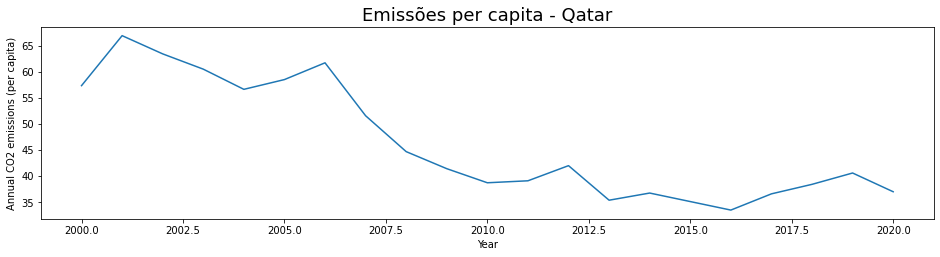

In [ ]:
# Visualização gráfica
def line_plot (x, y, dataset, title):
  plt.figure(figsize=(16,12))
  ax = plt.subplot(3,1,1)
  ax.set_title(title, fontsize=18)
  sns.lineplot(x=x, y=y, data=dataset)
  ax = ax

df_qatar = df_result.loc[(df_result['Entity'] == 'Qatar')]
df_qatar.set_index('Year', inplace = True) 
line_plot(df_qatar.index, df_qatar['Annual CO2 emissions (per capita)'], df_qatar, 'Emissões per capita - Qatar')

Veja só que interessante, o Qatar é um dos países que mais emite CO2 per capita do mundo e essa emissão já foi muito maior, eles estão em uma curva descendente o que é bom para o planeta, porém ainda tem muito o que melhorar.

Podemos fazer gráficos com todos os países da lista, plotei com o Qatar para exemplificar. Fica a critério do analista ou usuário.

Finalmente, vamos a última pergunta.

4. **Além de analisar as maiores emissões per capita dos vinte países com as maiores populações, queremos saber as emissões anuais destes países no ano mais recente.**

Já temos a resposta dessa pergunta, pois, fizemos uma tabela na pergunta (2) que mostra essa resposta. Vamos verificar a tabela novamente.

In [ ]:
# Verificar a tabela do item (2)
df_vinte

,Entity,Year,Annual CO2 emissions (per capita),Annual CO2 emissions,Population,PIB
17136,Qatar,2020,37.0193,106654967,2.881060e+06,1.463736e+11
13659,Mongolia,2020,26.9780,88441761,3.278292e+06,1.313713e+10
21035,Trinidad and Tobago,2020,25.3731,35509414,1.399491e+06,2.152982e+10
18128,Saudi Arabia,2020,17.9672,625507882,3.481387e+07,7.001179e+11
11350,Kazakhstan,2020,15.5158,291335929,1.875444e+07,1.698354e+11
1473,Australia,2020,15.3684,391891928,2.568704e+07,1.330901e+12
22264,United States,2020,14.2379,4712770573,3.294841e+08,2.093660e+13
4016,Canada,2020,14.1969,535822990,3.800524e+07,1.644037e+12
12496,Luxembourg,2020,13.0590,8174648,6.322750e+05,7.326398e+10
10036,Iceland,2020,8.6036,2935990,3.664250e+05,2.171808e+10


Essa tabela já nos diz as emissões anuais dos vinte países que estamos analisando. Podemos fazer gráficos de linha para esse dado também (emissões anuais), pois, ele também é uma série temporal, vamos verificar?

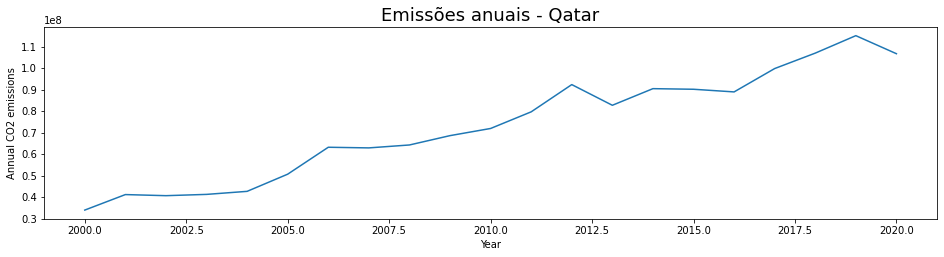

In [ ]:
# gráfico de linha das emissões anuais do qatar
line_plot(df_qatar.index, df_qatar['Annual CO2 emissions'], df_qatar, 'Emissões anuais - Qatar')

Vejam só que contradição interessante. As emissões per capita estão diminuindo e as emissões anuais estão aumentando, isso mostra que a população do Qatar vem crescendo bastante, diluindo as emissões per capita, porém o país está emitindo em sua totalidade, cada vez mais CO2 na atmosfera.

Vamos analisar a curva da população também para confirmar essa informação.

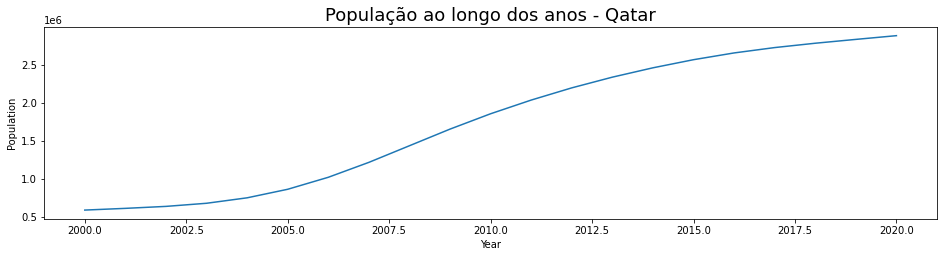

In [ ]:
# gráfico de linha da população do qatar
line_plot(df_qatar.index, df_qatar['Population'], df_qatar, 'População ao longo dos anos - Qatar')

Nossas suposições estavam corretas. Se os dados não tivessem sido mostrados de forma gráfica, talvez essa informação teria passado despercebida e estaríamos achando que o Qatar está melhorando suas emissões de CO2, quando na verdade, está piorando drasticamente.

Nesse caso, com todas as perguntas respondidas, chegou a hora de criar uma visualização final para os solicitantes das perguntas, tentando deixar todas as informações o mais claro possível para que não seja cometido esse tipo de engano. **Isso é muito importante para que uma tomada de decisão seja feita da forma mais assertiva possível. Veja como temos uma grande responsabilidade, qualquer erro ou omissão de informação pode levar a decisões extremamente equivocadas.**

<p align=center>
<img src="https://images.unsplash.com/photo-1527474305487-b87b222841cc?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=667&q=80" width="50%"></p>

Por fim, vamos exportar as nossas tabelas que possuem as respostas das perguntas do negócio para que possamos trabalhar nossa visualização e entrega do projeto no próximo tópico.

In [ ]:
# Exportanto tabela
df_result.to_excel(r'C:\User\Users\Desktop\Tabela_co2.xlsx', index=False)

## 3. Visualização final - entrega do projeto

Agora, é interessante documentar tudo e elaborar apresentações legais com visualizações claras.

Normalmente, trabalhamos nessa etapa depois de ter estudado e explorado os dados. Já temos em mente a estrutura do conteúdo, isso nos ajuda a encontrar as inspirações e os elementos visuais nas quais podemos trabalhar. **Isso será muito útil para a visualização final.**

Neste caso, pensando em nossos dados, precisamos de uma visualização capaz de transmitir uma informação temporal e temos que replicá-la para os vinte países em questão. Vamos trabalhar nessa visualização!
***

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/Analise_co2_planeta.png?raw=true" width="100%"></p>

***

Esse relatório foi montado por meio do PowerBI, uma ferramenta muito poderosa de visualização de dados que será compartilhada de forma dinâmica com os interessados na análise.

Veja que, tentei deixar o relatório o mais claro possível, de forma que todas as perguntas solicitadas pela empresa pudessem ser respondidas apenas interagindo com esse dashboard. **Essa etapa é fundamental, pois, é o que as pessoas irão ver, ela precisa estar muito clara para não gerar dúvidas e enganos.**

# Conclusão

Uma análise exploratória, geralmente é necessário em qualquer análise, mesmo que o objetivo final não seja simplesmente responder a algumas perguntas de negócio como foi aqui. 

Costumamos sempre passar por uma parte mais exploratória/descritiva em qualquer projeto de ciência de dados ou análise de dados, é essa exploração que vai te permitir conhecer os seus dados para que seja possível chegar no objetivo final de forma mais assertiva.

Nesse projeto passamos pelas seguintes etapas:
* Entender as perguntas do negócio;
* Coleta dos dados;
* Análise exploratória:    
  1. Preparação do conjunto de dados;
  2. Análise das perguntas solicitadas pela empresa.
* Visualização final e entrega do projeto.
